# Deep Learning Model Strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Loading in the Data

In [2]:
#connect to client
from ib_insync import *
util.startLoop()
ib = IB()

In [3]:
ib.connect('127.0.0.1', 7496, timeout=10)

<IB connected to 127.0.0.1:7496 clientId=1>

In [4]:
# For Foreign exchange
forex_contract = Forex("EURUSD")
forex_contract

Forex('EURUSD', exchange='IDEALPRO')

In [5]:
stream_data = ib.reqHistoricalData(
    forex_contract,
    endDateTime = '', 
    durationStr = '1 M', 
    barSizeSetting = '2 mins', 
    whatToShow = 'MIDPOINT',
    useRTH = True
)
stream_data

[BarData(date=datetime.datetime(2023, 5, 28, 17, 15, tzinfo=backports.zoneinfo.ZoneInfo(key='US/Eastern')), open=1.0724, high=1.07255, low=1.0724, close=1.07245, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 5, 28, 17, 16, tzinfo=backports.zoneinfo.ZoneInfo(key='US/Eastern')), open=1.07245, high=1.07245, low=1.0724, close=1.0724, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 5, 28, 17, 18, tzinfo=backports.zoneinfo.ZoneInfo(key='US/Eastern')), open=1.0724, high=1.07245, low=1.0723, close=1.07245, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 5, 28, 17, 20, tzinfo=backports.zoneinfo.ZoneInfo(key='US/Eastern')), open=1.07245, high=1.07245, low=1.07245, close=1.07245, volume=-1.0, average=-1.0, barCount=-1),
 BarData(date=datetime.datetime(2023, 5, 28, 17, 22, tzinfo=backports.zoneinfo.ZoneInfo(key='US/Eastern')), open=1.07245, high=1.07245, low=1.0724, close=1.07245, volume=-1.0, average=-1

In [6]:
data = util.df(stream_data)
data["date"]= data["date"].dt.tz_convert(None)
data = data.set_index('date')
data

,open,high,low,close,volume,average,barCount
date,,,,,,,
2023-05-28 21:15:00,1.07240,1.07255,1.07240,1.07245,-1.0,-1.0,-1
2023-05-28 21:16:00,1.07245,1.07245,1.07240,1.07240,-1.0,-1.0,-1
2023-05-28 21:18:00,1.07240,1.07245,1.07230,1.07245,-1.0,-1.0,-1
2023-05-28 21:20:00,1.07245,1.07245,1.07245,1.07245,-1.0,-1.0,-1
2023-05-28 21:22:00,1.07245,1.07245,1.07240,1.07245,-1.0,-1.0,-1
...,...,...,...,...,...,...,...
2023-06-27 15:32:00,1.09560,1.09565,1.09545,1.09550,-1.0,-1.0,-1
2023-06-27 15:34:00,1.09550,1.09565,1.09545,1.09565,-1.0,-1.0,-1
2023-06-27 15:36:00,1.09565,1.09615,1.09565,1.09615,-1.0,-1.0,-1


In [7]:
DNN_data = data.copy()
DNN_data = DNN_data.drop(columns = ['open', 'high', 'low', 'volume', 'average', 'barCount'])
DNN_data

,close
date,
2023-05-28 21:15:00,1.07245
2023-05-28 21:16:00,1.07240
2023-05-28 21:18:00,1.07245
2023-05-28 21:20:00,1.07245
2023-05-28 21:22:00,1.07245
...,...
2023-06-27 15:32:00,1.09550
2023-06-27 15:34:00,1.09565
2023-06-27 15:36:00,1.09615


In [8]:
ib.disconnect()

## Creating Features From the Data

In [9]:
window = 50

In [10]:
DNN_data["returns"] = np.log(DNN_data['close'] / DNN_data['close'].shift())
DNN_data.dropna(inplace = True)
DNN_data

,close,returns
date,,
2023-05-28 21:16:00,1.07240,-0.000047
2023-05-28 21:18:00,1.07245,0.000047
2023-05-28 21:20:00,1.07245,0.000000
2023-05-28 21:22:00,1.07245,0.000000
2023-05-28 21:24:00,1.07245,0.000000
...,...,...
2023-06-27 15:32:00,1.09550,-0.000091
2023-06-27 15:34:00,1.09565,0.000137
2023-06-27 15:36:00,1.09615,0.000456


In [11]:
DNN_data["dir"] = np.where(DNN_data["returns"] > 0, 1, 0)
DNN_data["sma"] = DNN_data['close'].rolling(window).mean() - DNN_data['close'].rolling(150).mean()
DNN_data["boll"] = (DNN_data['close'] - DNN_data['close'].rolling(window).mean()) / DNN_data['close'].rolling(window).std()
DNN_data["min"] = DNN_data['close'].rolling(window).min() / DNN_data['close'] - 1
DNN_data["max"] = DNN_data['close'].rolling(window).max() / DNN_data['close'] - 1
DNN_data["mom"] = DNN_data["returns"].rolling(3).mean()
DNN_data["vol"] = DNN_data["returns"].rolling(window).std()
DNN_data.dropna(inplace = True)
DNN_data

,close,returns,dir,sma,boll,min,max,mom,vol
date,,,,,,,,,
2023-05-29 02:14:00,1.07335,-0.000047,0,0.000286,1.286920,-0.001444,0.000093,-3.105397e-05,0.000102
2023-05-29 02:16:00,1.07340,0.000047,1,0.000310,1.329021,-0.001491,0.000047,6.247715e-18,0.000101
2023-05-29 02:18:00,1.07340,0.000000,0,0.000333,1.280940,-0.001491,0.000047,6.247715e-18,0.000101
2023-05-29 02:20:00,1.07340,0.000000,0,0.000353,1.230231,-0.001491,0.000047,1.552735e-05,0.000098
2023-05-29 02:22:00,1.07335,-0.000047,0,0.000373,1.092758,-0.001444,0.000093,-1.552735e-05,0.000098
...,...,...,...,...,...,...,...,...,...
2023-06-27 15:32:00,1.09550,-0.000091,0,-0.000088,0.077426,-0.000867,0.001004,-2.065405e-17,0.000262
2023-06-27 15:34:00,1.09565,0.000137,1,-0.000116,0.442111,-0.001004,0.000867,4.563814e-05,0.000262
2023-06-27 15:36:00,1.09615,0.000456,1,-0.000136,1.576792,-0.001460,0.000411,1.672940e-04,0.000271


## Creating Lags of Inputs

In [12]:
lags = 5
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

In [13]:
for f in features:
        for lag in range(1, lags + 1):
            col = "{}_lag_{}".format(f, lag)
            DNN_data[col] = DNN_data[f].shift(lag)
            cols.append(col)
DNN_data.dropna(inplace = True)

In [14]:
DNN_data

,close,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
date,,,,,,,,,,,,,,,,,,,,,
2023-05-29 02:24:00,1.07335,0.000000,0,0.000393,1.052401,-0.001444,0.000093,-1.552735e-05,0.000098,0.0,...,-1.552735e-05,1.552735e-05,6.247715e-18,6.247715e-18,-3.105397e-05,0.000098,0.000098,0.000101,0.000101,0.000102
2023-05-29 02:26:00,1.07335,0.000000,0,0.000413,1.014050,-0.001444,0.000093,-1.552735e-05,0.000098,0.0,...,-1.552735e-05,-1.552735e-05,1.552735e-05,6.247715e-18,6.247715e-18,0.000098,0.000098,0.000098,0.000101,0.000101
2023-05-29 02:28:00,1.07340,0.000047,1,0.000432,1.069831,-0.001491,0.000047,1.552735e-05,0.000098,0.0,...,-1.552735e-05,-1.552735e-05,-1.552735e-05,1.552735e-05,6.247715e-18,0.000098,0.000098,0.000098,0.000098,0.000101
2023-05-29 02:30:00,1.07345,0.000047,1,0.000451,1.124789,-0.001537,0.000000,3.105397e-05,0.000098,1.0,...,1.552735e-05,-1.552735e-05,-1.552735e-05,-1.552735e-05,1.552735e-05,0.000098,0.000098,0.000098,0.000098,0.000098
2023-05-29 02:32:00,1.07330,-0.000140,0,0.000468,0.795115,-0.001398,0.000140,-1.552807e-05,0.000101,1.0,...,3.105397e-05,1.552735e-05,-1.552735e-05,-1.552735e-05,-1.552735e-05,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27 15:32:00,1.09550,-0.000091,0,-0.000088,0.077426,-0.000867,0.001004,-2.065405e-17,0.000262,1.0,...,-6.084391e-05,-6.084946e-05,1.937108e-17,2.130023e-04,1.673627e-04,0.000263,0.000262,0.000262,0.000274,0.000274
2023-06-27 15:34:00,1.09565,0.000137,1,-0.000116,0.442111,-0.001004,0.000867,4.563814e-05,0.000262,0.0,...,-2.065405e-17,-6.084391e-05,-6.084946e-05,1.937108e-17,2.130023e-04,0.000262,0.000263,0.000262,0.000262,0.000274
2023-06-27 15:36:00,1.09615,0.000456,1,-0.000136,1.576792,-0.001460,0.000411,1.672940e-04,0.000271,1.0,...,4.563814e-05,-2.065405e-17,-6.084391e-05,-6.084946e-05,1.937108e-17,0.000262,0.000262,0.000263,0.000262,0.000262


In [15]:
DNN_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15372 entries, 2023-05-29 02:24:00 to 2023-06-27 15:40:00
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close       15372 non-null  float64
 1   returns     15372 non-null  float64
 2   dir         15372 non-null  int32  
 3   sma         15372 non-null  float64
 4   boll        15372 non-null  float64
 5   min         15372 non-null  float64
 6   max         15372 non-null  float64
 7   mom         15372 non-null  float64
 8   vol         15372 non-null  float64
 9   dir_lag_1   15372 non-null  float64
 10  dir_lag_2   15372 non-null  float64
 11  dir_lag_3   15372 non-null  float64
 12  dir_lag_4   15372 non-null  float64
 13  dir_lag_5   15372 non-null  float64
 14  sma_lag_1   15372 non-null  float64
 15  sma_lag_2   15372 non-null  float64
 16  sma_lag_3   15372 non-null  float64
 17  sma_lag_4   15372 non-null  float64
 18  sma_lag_5   15372 non-null  flo

In [16]:
len(cols)

35

## Splitting into Train and Test Set

In [17]:
split = int(len(DNN_data)*0.66)
split

10145

In [18]:
train = DNN_data.iloc[:split].copy()
train

,close,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
date,,,,,,,,,,,,,,,,,,,,,
2023-05-29 02:24:00,1.07335,0.000000,0,0.000393,1.052401,-0.001444,0.000093,-0.000016,0.000098,0.0,...,-0.000016,0.000016,6.247715e-18,6.247715e-18,-3.105397e-05,0.000098,0.000098,0.000101,0.000101,0.000102
2023-05-29 02:26:00,1.07335,0.000000,0,0.000413,1.014050,-0.001444,0.000093,-0.000016,0.000098,0.0,...,-0.000016,-0.000016,1.552735e-05,6.247715e-18,6.247715e-18,0.000098,0.000098,0.000098,0.000101,0.000101
2023-05-29 02:28:00,1.07340,0.000047,1,0.000432,1.069831,-0.001491,0.000047,0.000016,0.000098,0.0,...,-0.000016,-0.000016,-1.552735e-05,1.552735e-05,6.247715e-18,0.000098,0.000098,0.000098,0.000098,0.000101
2023-05-29 02:30:00,1.07345,0.000047,1,0.000451,1.124789,-0.001537,0.000000,0.000031,0.000098,1.0,...,0.000016,-0.000016,-1.552735e-05,-1.552735e-05,1.552735e-05,0.000098,0.000098,0.000098,0.000098,0.000098
2023-05-29 02:32:00,1.07330,-0.000140,0,0.000468,0.795115,-0.001398,0.000140,-0.000016,0.000101,1.0,...,0.000031,0.000016,-1.552735e-05,-1.552735e-05,-1.552735e-05,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16 07:40:00,1.09405,-0.000046,0,0.000482,-1.169956,-0.000320,0.001919,-0.000030,0.000210,1.0,...,-0.000107,-0.000168,1.523287e-05,2.132651e-04,2.437204e-04,0.000215,0.000215,0.000216,0.000213,0.000212
2023-06-16 07:42:00,1.09425,0.000183,1,0.000482,-0.844476,-0.000503,0.001736,0.000076,0.000212,0.0,...,-0.000030,-0.000107,-1.675386e-04,1.523287e-05,2.132651e-04,0.000210,0.000215,0.000215,0.000216,0.000213
2023-06-16 07:44:00,1.09400,-0.000228,0,0.000476,-1.222660,-0.000274,0.001965,-0.000030,0.000214,1.0,...,0.000076,-0.000030,-1.066155e-04,-1.675386e-04,1.523287e-05,0.000212,0.000210,0.000215,0.000215,0.000216


In [19]:
test = DNN_data.iloc[split:].copy()
test

,close,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
date,,,,,,,,,,,,,,,,,,,,,
2023-06-16 07:50:00,1.09375,-0.000183,0,0.000433,-1.476863,-0.000046,0.002194,-7.618177e-05,0.000208,0.0,...,-9.139932e-05,-1.523426e-05,-3.046783e-05,7.616436e-05,-3.046644e-05,0.000211,0.000212,0.000214,0.000212,0.000210
2023-06-16 07:52:00,1.09400,0.000229,1,0.000416,-1.061414,-0.000274,0.001965,-1.588356e-17,0.000211,0.0,...,-7.618177e-05,-9.139932e-05,-1.523426e-05,-3.046783e-05,7.616436e-05,0.000208,0.000211,0.000212,0.000214,0.000212
2023-06-16 07:54:00,1.09390,-0.000091,0,0.000396,-1.167472,-0.000183,0.002057,-1.523566e-05,0.000211,1.0,...,-1.588356e-17,-7.618177e-05,-9.139932e-05,-1.523426e-05,-3.046783e-05,0.000211,0.000208,0.000211,0.000212,0.000214
2023-06-16 07:56:00,1.09440,0.000457,1,0.000380,-0.413158,-0.000640,0.001599,1.980364e-04,0.000221,0.0,...,-1.523566e-05,-1.588356e-17,-7.618177e-05,-9.139932e-05,-1.523426e-05,0.000211,0.000211,0.000208,0.000211,0.000212
2023-06-16 07:58:00,1.09425,-0.000137,0,0.000361,-0.611393,-0.000503,0.001736,7.616436e-05,0.000221,1.0,...,1.980364e-04,-1.523566e-05,-1.588356e-17,-7.618177e-05,-9.139932e-05,0.000221,0.000211,0.000211,0.000208,0.000211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27 15:32:00,1.09550,-0.000091,0,-0.000088,0.077426,-0.000867,0.001004,-2.065405e-17,0.000262,1.0,...,-6.084391e-05,-6.084946e-05,1.937108e-17,2.130023e-04,1.673627e-04,0.000263,0.000262,0.000262,0.000274,0.000274
2023-06-27 15:34:00,1.09565,0.000137,1,-0.000116,0.442111,-0.001004,0.000867,4.563814e-05,0.000262,0.0,...,-2.065405e-17,-6.084391e-05,-6.084946e-05,1.937108e-17,2.130023e-04,0.000262,0.000263,0.000262,0.000262,0.000274
2023-06-27 15:36:00,1.09615,0.000456,1,-0.000136,1.576792,-0.001460,0.000411,1.672940e-04,0.000271,1.0,...,4.563814e-05,-2.065405e-17,-6.084391e-05,-6.084946e-05,1.937108e-17,0.000262,0.000262,0.000263,0.000262,0.000262


## Feature Scaling (Standardization)

In [20]:
train[cols]

,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
date,,,,,,,,,,,,,,,,,,,,,
2023-05-29 02:24:00,0.0,0.0,0.0,1.0,0.0,0.000373,0.000353,0.000333,0.000310,0.000286,...,-0.000016,0.000016,6.247715e-18,6.247715e-18,-3.105397e-05,0.000098,0.000098,0.000101,0.000101,0.000102
2023-05-29 02:26:00,0.0,0.0,0.0,0.0,1.0,0.000393,0.000373,0.000353,0.000333,0.000310,...,-0.000016,-0.000016,1.552735e-05,6.247715e-18,6.247715e-18,0.000098,0.000098,0.000098,0.000101,0.000101
2023-05-29 02:28:00,0.0,0.0,0.0,0.0,0.0,0.000413,0.000393,0.000373,0.000353,0.000333,...,-0.000016,-0.000016,-1.552735e-05,1.552735e-05,6.247715e-18,0.000098,0.000098,0.000098,0.000098,0.000101
2023-05-29 02:30:00,1.0,0.0,0.0,0.0,0.0,0.000432,0.000413,0.000393,0.000373,0.000353,...,0.000016,-0.000016,-1.552735e-05,-1.552735e-05,1.552735e-05,0.000098,0.000098,0.000098,0.000098,0.000098
2023-05-29 02:32:00,1.0,1.0,0.0,0.0,0.0,0.000451,0.000432,0.000413,0.000393,0.000373,...,0.000031,0.000016,-1.552735e-05,-1.552735e-05,-1.552735e-05,0.000098,0.000098,0.000098,0.000098,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16 07:40:00,1.0,0.0,0.0,0.0,1.0,0.000485,0.000481,0.000479,0.000480,0.000479,...,-0.000107,-0.000168,1.523287e-05,2.132651e-04,2.437204e-04,0.000215,0.000215,0.000216,0.000213,0.000212
2023-06-16 07:42:00,0.0,1.0,0.0,0.0,0.0,0.000482,0.000485,0.000481,0.000479,0.000480,...,-0.000030,-0.000107,-1.675386e-04,1.523287e-05,2.132651e-04,0.000210,0.000215,0.000215,0.000216,0.000213
2023-06-16 07:44:00,1.0,0.0,1.0,0.0,0.0,0.000482,0.000482,0.000485,0.000481,0.000479,...,0.000076,-0.000030,-1.066155e-04,-1.675386e-04,1.523287e-05,0.000212,0.000210,0.000215,0.000215,0.000216


In [21]:
mu, std = train.mean(), train.std() # train set parameters (mu, std) for standardization

In [22]:
std

close         0.006362
returns       0.000155
dir           0.489618
sma           0.000861
boll          1.373288
min           0.000819
max           0.000676
mom           0.000090
vol           0.000076
dir_lag_1     0.489618
dir_lag_2     0.489618
dir_lag_3     0.489618
dir_lag_4     0.489618
dir_lag_5     0.489618
sma_lag_1     0.000861
sma_lag_2     0.000861
sma_lag_3     0.000861
sma_lag_4     0.000861
sma_lag_5     0.000861
boll_lag_1    1.373265
boll_lag_2    1.373257
boll_lag_3    1.373250
boll_lag_4    1.373276
boll_lag_5    1.373274
min_lag_1     0.000819
min_lag_2     0.000819
min_lag_3     0.000819
min_lag_4     0.000819
min_lag_5     0.000819
max_lag_1     0.000676
max_lag_2     0.000676
max_lag_3     0.000675
max_lag_4     0.000675
max_lag_5     0.000675
mom_lag_1     0.000090
mom_lag_2     0.000090
mom_lag_3     0.000090
mom_lag_4     0.000090
mom_lag_5     0.000090
vol_lag_1     0.000076
vol_lag_2     0.000076
vol_lag_3     0.000076
vol_lag_4     0.000076
vol_lag_5  

In [23]:
train_s = (train - mu) / std # standardization of train set features

In [24]:
train_s

,close,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
date,,,,,,,,,,,,,,,,,,,,,
2023-05-29 02:24:00,-0.255554,-0.012090,-0.813944,0.329408,0.715776,-0.895665,-0.749523,-0.194390,-0.482211,-0.813944,...,-0.194484,0.152416,-0.021085,-0.021002,-0.367940,-0.482083,-0.481943,-0.447915,-0.447789,-0.429147
2023-05-29 02:26:00,-0.255554,-0.012090,-0.813944,0.352632,0.687849,-0.895665,-0.749523,-0.194390,-0.482211,-0.813944,...,-0.194484,-0.194518,0.152383,-0.021002,-0.021001,-0.482083,-0.481954,-0.481817,-0.447789,-0.447667
2023-05-29 02:28:00,-0.247694,0.288452,1.228465,0.374307,0.728468,-0.952451,-0.818458,0.152525,-0.488129,-0.813944,...,-0.194484,-0.194518,-0.194553,0.152472,-0.021001,-0.482083,-0.481954,-0.481828,-0.481692,-0.447667
2023-05-29 02:30:00,-0.239835,0.288438,1.228465,0.396757,0.768487,-1.009233,-0.887386,0.325975,-0.488190,1.228465,...,0.152449,-0.194518,-0.194553,-0.194475,0.152473,-0.488001,-0.481954,-0.481828,-0.481703,-0.481571
2023-05-29 02:32:00,-0.263413,-0.913717,-0.813944,0.416884,0.528426,-0.838873,-0.680582,-0.194398,-0.453008,1.228465,...,0.325908,0.152416,-0.194553,-0.194475,-0.194475,-0.488063,-0.487873,-0.481828,-0.481703,-0.481582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16 07:40:00,2.998252,-0.306946,-0.813944,0.432754,-0.902498,0.476784,1.952955,-0.361276,0.995162,1.228465,...,-1.212092,-1.892741,0.149093,2.361626,2.701877,1.059346,1.055839,1.076833,1.030969,1.025432
2023-06-16 07:42:00,3.029690,1.167253,1.228465,0.432367,-0.665490,0.253715,1.681977,0.829908,1.017153,-0.813944,...,-0.361379,-1.212126,-1.892786,0.149182,2.361626,0.995347,1.059535,1.056033,1.077022,1.031150
2023-06-16 07:44:00,2.990392,-1.486303,-0.813944,0.426174,-0.940876,0.532564,2.020715,-0.361292,1.047612,1.228465,...,0.829867,-0.361413,-1.212168,-1.892767,0.149183,1.017338,0.995533,1.059729,1.056221,1.077206


In [25]:
train_s.describe()

,close,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,...,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04,1.014500e+04
mean,4.930414e-13,-3.494330e-16,3.453346e-16,-7.273083e-17,6.591299e-17,-6.840801e-15,-4.497361e-16,8.181397e-17,-1.944187e-15,3.617937e-16,...,-1.358696e-16,-6.229615e-17,-5.227733e-17,6.743962e-17,-5.410491e-17,-1.577688e-15,-1.420188e-15,-7.994262e-16,-1.255914e-15,-1.154501e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.796003e+00,-1.756908e+01,-8.139437e-01,-2.550749e+00,-4.360502e+00,-7.707369e+00,-8.873857e-01,-1.531689e+01,-1.477620e+00,-8.139437e-01,...,-1.531777e+01,-1.531781e+01,-1.531794e+01,-1.531838e+01,-1.531838e+01,-1.477530e+00,-1.477440e+00,-1.477358e+00,-1.477275e+00,-1.477193e+00
25%,-7.192602e-01,-3.138694e-01,-8.139437e-01,-5.023967e-01,-8.179662e-01,-2.728930e-01,-6.801862e-01,-3.694143e-01,-7.203301e-01,-8.139437e-01,...,-3.695169e-01,-3.695511e-01,-3.695870e-01,-3.695157e-01,-3.695149e-01,-7.202112e-01,-7.200920e-01,-7.199764e-01,-7.198616e-01,-7.197498e-01
50%,-2.555536e-01,-1.209000e-02,-8.139437e-01,-9.907419e-02,6.160980e-02,3.528245e-01,-3.347247e-01,-2.093254e-02,-2.333047e-01,-8.139437e-01,...,-2.101718e-02,-2.105106e-02,-2.108475e-02,-2.100159e-02,-2.100094e-02,-2.332097e-01,-2.333976e-01,-2.334497e-01,-2.336967e-01,-2.338355e-01
75%,4.675143e-01,2.899437e-01,1.228465e+00,4.354637e-01,7.976692e-01,6.395270e-01,2.900422e-01,4.959731e-01,4.786613e-01,1.228465e+00,...,4.959152e-01,4.958816e-01,4.958512e-01,4.959519e-01,4.959525e-01,4.781853e-01,4.779892e-01,4.774246e-01,4.774730e-01,4.772295e-01
max,3.328348e+00,1.477027e+01,1.228465e+00,4.734990e+00,4.347624e+00,8.673527e-01,6.986538e+00,1.111850e+01,5.693332e+00,1.228465e+00,...,1.111899e+01,1.111897e+01,1.111901e+01,1.111947e+01,1.111947e+01,5.693696e+00,5.694065e+00,5.694465e+00,5.694844e+00,5.695211e+00


## Creating and Fitting the DNN Model

In [26]:
from DNNModel import *

Using TensorFlow backend.


In [27]:
# fitting a DNN model with 3 Hidden Layers (50 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = True,
          validation_split = 0.2, shuffle = False, class_weight = cw(train))

Train on 8116 samples, validate on 2029 samples
Epoch 1/50
8116/8116 [==============================] - 1s 72us/step - loss: 0.7131 - accuracy: 0.5216 - val_loss: 0.6916 - val_accuracy: 0.4421
Epoch 2/50
8116/8116 [==============================] - 0s 42us/step - loss: 0.7027 - accuracy: 0.4941 - val_loss: 0.6910 - val_accuracy: 0.4480
Epoch 3/50
8116/8116 [==============================] - 0s 43us/step - loss: 0.7013 - accuracy: 0.4973 - val_loss: 0.6903 - val_accuracy: 0.4682
Epoch 4/50
8116/8116 [==============================] - 0s 40us/step - loss: 0.6959 - accuracy: 0.5171 - val_loss: 0.6903 - val_accuracy: 0.4756
Epoch 5/50
8116/8116 [==============================] - 0s 42us/step - loss: 0.6983 - accuracy: 0.4967 - val_loss: 0.6901 - val_accuracy: 0.4805
Epoch 6/50
8116/8116 [==============================] - 0s 41us/step - loss: 0.6950 - accuracy: 0.5160 - val_loss: 0.6902 - val_accuracy: 0.4791
Epoch 7/50
8116/8116 [==============================] - 0s 42us/step - loss: 0.695

In [28]:
model.evaluate(train_s[cols], train["dir"]) # evaluate the fit on the train set

10145/10145 [==============================] - 0s 11us/step


[0.6875187639181928, 0.5428289771080017]

In [29]:
pred = model.predict(train_s[cols]) # prediction (probabilities)
pred

array([[0.513909  ],
       [0.51233554],
       [0.49774382],
       ...,
       [0.5442153 ],
       [0.5501825 ],
       [0.52633923]], dtype=float32)

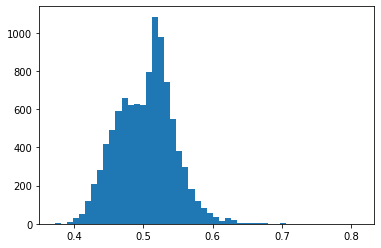

In [30]:
plt.hist(pred, bins = 50)
plt.show()

## Out-Sample Prediction and Forward Testing

In [31]:
test

,close,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
date,,,,,,,,,,,,,,,,,,,,,
2023-06-16 07:50:00,1.09375,-0.000183,0,0.000433,-1.476863,-0.000046,0.002194,-7.618177e-05,0.000208,0.0,...,-9.139932e-05,-1.523426e-05,-3.046783e-05,7.616436e-05,-3.046644e-05,0.000211,0.000212,0.000214,0.000212,0.000210
2023-06-16 07:52:00,1.09400,0.000229,1,0.000416,-1.061414,-0.000274,0.001965,-1.588356e-17,0.000211,0.0,...,-7.618177e-05,-9.139932e-05,-1.523426e-05,-3.046783e-05,7.616436e-05,0.000208,0.000211,0.000212,0.000214,0.000212
2023-06-16 07:54:00,1.09390,-0.000091,0,0.000396,-1.167472,-0.000183,0.002057,-1.523566e-05,0.000211,1.0,...,-1.588356e-17,-7.618177e-05,-9.139932e-05,-1.523426e-05,-3.046783e-05,0.000211,0.000208,0.000211,0.000212,0.000214
2023-06-16 07:56:00,1.09440,0.000457,1,0.000380,-0.413158,-0.000640,0.001599,1.980364e-04,0.000221,0.0,...,-1.523566e-05,-1.588356e-17,-7.618177e-05,-9.139932e-05,-1.523426e-05,0.000211,0.000211,0.000208,0.000211,0.000212
2023-06-16 07:58:00,1.09425,-0.000137,0,0.000361,-0.611393,-0.000503,0.001736,7.616436e-05,0.000221,1.0,...,1.980364e-04,-1.523566e-05,-1.588356e-17,-7.618177e-05,-9.139932e-05,0.000221,0.000211,0.000211,0.000208,0.000211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27 15:32:00,1.09550,-0.000091,0,-0.000088,0.077426,-0.000867,0.001004,-2.065405e-17,0.000262,1.0,...,-6.084391e-05,-6.084946e-05,1.937108e-17,2.130023e-04,1.673627e-04,0.000263,0.000262,0.000262,0.000274,0.000274
2023-06-27 15:34:00,1.09565,0.000137,1,-0.000116,0.442111,-0.001004,0.000867,4.563814e-05,0.000262,0.0,...,-2.065405e-17,-6.084391e-05,-6.084946e-05,1.937108e-17,2.130023e-04,0.000262,0.000263,0.000262,0.000262,0.000274
2023-06-27 15:36:00,1.09615,0.000456,1,-0.000136,1.576792,-0.001460,0.000411,1.672940e-04,0.000271,1.0,...,4.563814e-05,-2.065405e-17,-6.084391e-05,-6.084946e-05,1.937108e-17,0.000262,0.000262,0.000263,0.000262,0.000262


In [32]:
test_s = (test - mu) / std # standardization of test set features (with train set parameters!!!)

In [33]:
model.evaluate(test_s[cols], test["dir"])

5227/5227 [==============================] - 0s 12us/step


[0.6883980340590001, 0.5354887843132019]

In [34]:
pred = model.predict(test_s[cols])
pred

array([[0.5469778 ],
       [0.54309064],
       [0.5542837 ],
       ...,
       [0.53240794],
       [0.5206969 ],
       [0.5343013 ]], dtype=float32)

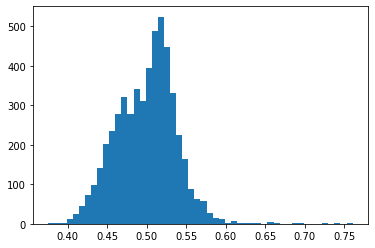

In [35]:
plt.hist(pred, bins = 50);

In [36]:
test["proba"] = model.predict(test_s[cols])
test["position"] = np.where(test.proba < 0.47, -1, np.nan) # 1. short where proba < 0.47
test["position"] = np.where(test.proba > 0.53, 1, test.position) # 2. long where proba > 0.53

In [37]:
test["hour"] = test.index.hour
test

,close,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,proba,position,hour
date,,,,,,,,,,,,,,,,,,,,,
2023-06-16 07:50:00,1.09375,-0.000183,0,0.000433,-1.476863,-0.000046,0.002194,-7.618177e-05,0.000208,0.0,...,7.616436e-05,-3.046644e-05,0.000211,0.000212,0.000214,0.000212,0.000210,0.546978,1.0,7
2023-06-16 07:52:00,1.09400,0.000229,1,0.000416,-1.061414,-0.000274,0.001965,-1.588356e-17,0.000211,0.0,...,-3.046783e-05,7.616436e-05,0.000208,0.000211,0.000212,0.000214,0.000212,0.543091,1.0,7
2023-06-16 07:54:00,1.09390,-0.000091,0,0.000396,-1.167472,-0.000183,0.002057,-1.523566e-05,0.000211,1.0,...,-1.523426e-05,-3.046783e-05,0.000211,0.000208,0.000211,0.000212,0.000214,0.554284,1.0,7
2023-06-16 07:56:00,1.09440,0.000457,1,0.000380,-0.413158,-0.000640,0.001599,1.980364e-04,0.000221,0.0,...,-9.139932e-05,-1.523426e-05,0.000211,0.000211,0.000208,0.000211,0.000212,0.544451,1.0,7
2023-06-16 07:58:00,1.09425,-0.000137,0,0.000361,-0.611393,-0.000503,0.001736,7.616436e-05,0.000221,1.0,...,-7.618177e-05,-9.139932e-05,0.000221,0.000211,0.000211,0.000208,0.000211,0.523027,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27 15:32:00,1.09550,-0.000091,0,-0.000088,0.077426,-0.000867,0.001004,-2.065405e-17,0.000262,1.0,...,2.130023e-04,1.673627e-04,0.000263,0.000262,0.000262,0.000274,0.000274,0.515115,NaN,15
2023-06-27 15:34:00,1.09565,0.000137,1,-0.000116,0.442111,-0.001004,0.000867,4.563814e-05,0.000262,0.0,...,1.937108e-17,2.130023e-04,0.000262,0.000263,0.000262,0.000262,0.000274,0.522463,NaN,15
2023-06-27 15:36:00,1.09615,0.000456,1,-0.000136,1.576792,-0.001460,0.000411,1.672940e-04,0.000271,1.0,...,-6.084946e-05,1.937108e-17,0.000262,0.000262,0.000263,0.000262,0.000262,0.532408,1.0,15


In [38]:
test["position"] = np.where(~test.hour.between(2, 12), 0, test.position) # 3. neutral in non-busy hours

In [39]:
test["position"] = test.position.ffill().fillna(0) # 4. in all other cases: hold position

In [40]:
test.position.value_counts(dropna = False)

 0.0    2791
 1.0    1429
-1.0    1007
Name: position, dtype: int64

In [41]:
test["strategy"] = test["position"] * test["returns"]

In [42]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

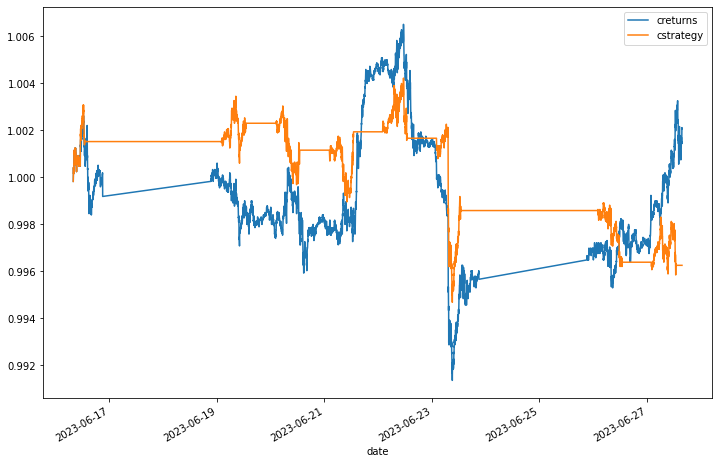

In [43]:
test[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [44]:
ptc = 0.000059

In [45]:
test["trades"] = test.position.diff().abs()

In [46]:
test.trades.value_counts()

0.0    5176
2.0      35
1.0      15
Name: trades, dtype: int64

In [47]:
test["strategy_net"] = test.strategy - test.trades * ptc

In [48]:
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

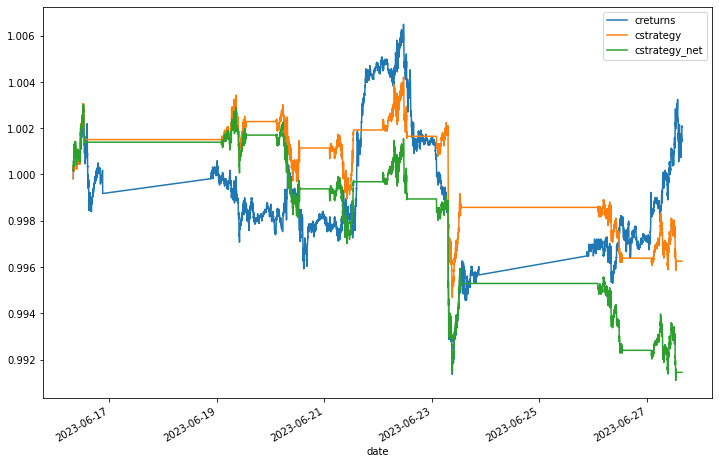

In [49]:
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()